In [1]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Load the dataset
df = pd.read_csv('Iris.csv')

#Print the first 5 rows of the dataframe.
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
#Let's create numpy arrays for features and target
X = df.drop('Species',axis=1).values
y = df['Species'].values

In [5]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

In [7]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

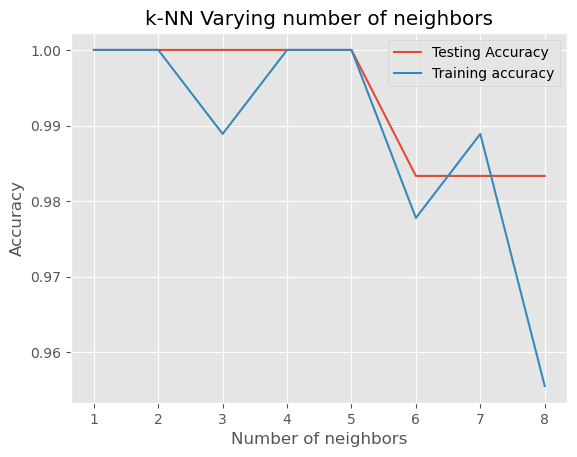

In [8]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [9]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [10]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.9833333333333333

In [12]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [13]:
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [14]:
confusion_matrix(y_test,y_pred)

array([[20,  0,  0],
       [ 1, 19,  0],
       [ 0,  0, 20]], dtype=int64)

In [15]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Iris-setosa,Iris-versicolor,Iris-virginica,All
True,,,,
Iris-setosa,20,0,0,20
Iris-versicolor,1,19,0,20
Iris-virginica,0,0,20,20
All,21,19,20,60


In [16]:
#import classification_report
from sklearn.metrics import classification_report

In [17]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       0.95      1.00      0.98        20
Iris-versicolor       1.00      0.95      0.97        20
 Iris-virginica       1.00      1.00      1.00        20

       accuracy                           0.98        60
      macro avg       0.98      0.98      0.98        60
   weighted avg       0.98      0.98      0.98        60



In [18]:
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [28]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

In [24]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [25]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [26]:
knn_cv.best_score_

0.8799999999999999

In [27]:
knn_cv.best_params_

{'n_neighbors': 2}